In [6]:


import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)
import tifffile


#Make sure the GPU is available. 
#import tensorflow as tf

device_name = tf.test.gpu_device_name()

print("device_name", device_name)

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.13.1
2.13.1
device_name /device:GPU:0
Found GPU at: /device:GPU:0


2024-07-28 12:03:31.574834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-28 12:03:31.576833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-28 12:03:31.582719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
import segmentation_models_3D as sm


from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Segmentation Models: using `tf.keras` framework.


In [8]:
# model 1 with alfalfa : sampling_group_fractions = [0.023, 1.0, 0.4547]

sampling_group_fractions = [1.0, 1.0, 1.0]

In [19]:
#crop_no = 3
#vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'VISTA_NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}

#input_img0 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n5.tif')
#input_mask0 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n5.tif').astype(np.uint8)

In [5]:
num_epochs = 1500
vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'VISTA_NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}

chosen_crop_types_list = [11,  12,  13]


all_input_img = []
all_input_mask = []

#chosen_crop_types_list = [ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41]



all_input_img_f = []
all_input_mask_f = []
counted = 0
for crop_no in chosen_crop_types_list:
    chosen_crop_type = vista_crop_dict[crop_no]
    print("chosen_crop_type", chosen_crop_type)
    input_img = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train_'+vista_crop_dict[crop_no]+'.tif')
    input_mask = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab_'+vista_crop_dict[crop_no]+'.tif').astype(np.uint8)


    input_img0 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n0.tif')
    input_mask0 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n0.tif').astype(np.uint8)


    input_img1 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n1.tif')
    input_mask1 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n1.tif').astype(np.uint8)

    input_img2 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n2.tif')
    input_mask2 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n2.tif').astype(np.uint8)

    input_img3 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n3.tif')
    input_mask3 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n3.tif').astype(np.uint8)

    input_img4 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n4.tif')
    input_mask4 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n4.tif').astype(np.uint8)

    input_img5 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train'+vista_crop_dict[crop_no]+'n5.tif')
    input_mask5 = io.imread('/home/luser/stelar_3dunet/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab'+vista_crop_dict[crop_no]+'n5.tif').astype(np.uint8)


    input_img_f = np.concatenate((input_img, input_img0, input_img1, input_img2, input_img3, input_img4, input_img5), axis=0)
    input_mask_f = np.concatenate((input_mask, input_mask0, input_mask1, input_mask2, input_mask3, input_mask4, input_mask5 ), axis=0)


    bis = int(len(input_img_f)*sampling_group_fractions[counted])-50

    print("bis", bis)
    print("before input_img_f.shape", input_img_f.shape)
    print("before input_mask_f.shape", input_mask_f.shape)

    input_img_f = input_img_f[:bis]
    input_mask_f = input_mask_f[:bis]

    print("after input_img_f.shape", input_img_f.shape)
    print("after input_mask_f.shape", input_mask_f.shape)

    all_input_img_f.append(input_img_f)
    all_input_mask_f.append(input_mask_f)
    counted+=1
all_input_img_f = np.concatenate((all_input_img_f), axis=0)
all_input_mask_f = np.concatenate((all_input_mask_f), axis=0)


print("all_input_img_f.shape", all_input_img_f.shape)
print("all_input_mask_f.shape", all_input_mask_f.shape)


chosen_crop_type LEGUMES
bis 4305
before input_img_f.shape (4355, 64, 64, 64)
before input_mask_f.shape (4355, 64, 64)
after input_img_f.shape (4305, 64, 64, 64)
after input_mask_f.shape (4305, 64, 64)
chosen_crop_type VISTA_NA


ValueError: failed to read 1690304512 bytes, got 1460059888

In [31]:
crps, counts = np.unique(all_input_mask_f, return_counts=True)

In [32]:
crps, counts

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 12, 13, 14, 15, 16, 18, 19,
        20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41],
       dtype=uint8),
 array([8009285, 1201398,  282021,  588737,     560,    1616,   89868,
        1303726, 1895576,  451561,  173612,  474434,    1995,    6143,
           1742,  268120,  805697,    6966,    1557,     192,     106,
           1531, 1287499,  516889,  355817,   32564,    7042,  420214,
           1404,  119477, 2680555]))

In [40]:
selected_counts = np.array([counts[0], counts[np.where(crps == chosen_crop_types_list[0])[0][0]], counts[np.where(crps == chosen_crop_types_list[1])[0][0]], counts[np.where(crps == chosen_crop_types_list[2])[0][0]]])
selected_counts_fractions = selected_counts/np.sum(selected_counts)


In [41]:
selected_counts, selected_counts_fractions

(array([8009285, 1201398,  282021,  588737]),
 array([0.79445835, 0.11916927, 0.02797427, 0.0583981 ]))

In [46]:
selected_counts_fractions_f = selected_counts_fractions**(-1)

weights = selected_counts_fractions_f/np.sum(selected_counts_fractions_f)

In [48]:
selected_counts_fractions_f, weights, np.sum(weights)

(array([ 1.25871922,  8.39142482, 35.74712876, 17.12384477]),
 array([0.02013271, 0.13421745, 0.57176087, 0.27388897]),
 1.0)

In [ ]:
weights [0.02013271 0.13421745 0.57176087 0.27388897]
weights[0] 0.020132705119794935
weights[1] 0.13421744761136342
weights[2] 0.5717608728619387
weights[3] 0.27388897440690296

<BarContainer object of 4 artists>

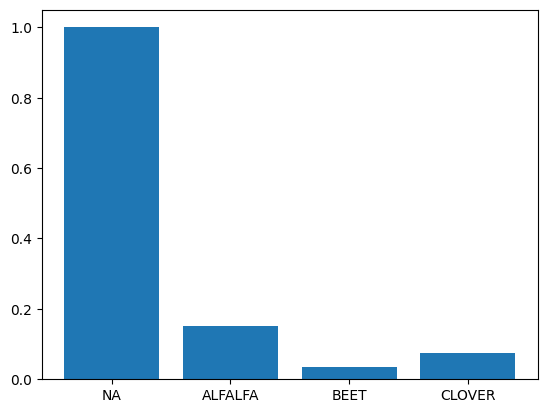

In [39]:
plt.bar([vista_crop_dict[0], vista_crop_dict[chosen_crop_types_list[0]], vista_crop_dict[chosen_crop_types_list[1]], vista_crop_dict[chosen_crop_types_list[2]]], selected_counts_fractions)

In [55]:
#tifffile.imsave('/home/luser/stelar_3d/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train_'+vista_crop_dict[crop_no]+'.tif', input_img)


#tifffile.imsave('/home/luser/stelar_3d/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab_'+vista_crop_dict[crop_no]+'.tif', input_mask)


In [169]:
input_img = io.imread('/home/luser/stelar_3d/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/train_'+vista_crop_dict[crop_no]+'.tif')
input_mask = io.imread('/home/luser/stelar_3d/storage/per_crop_data_labels/'+vista_crop_dict[crop_no]+'/lab_'+vista_crop_dict[crop_no]+'.tif').astype(np.uint8)

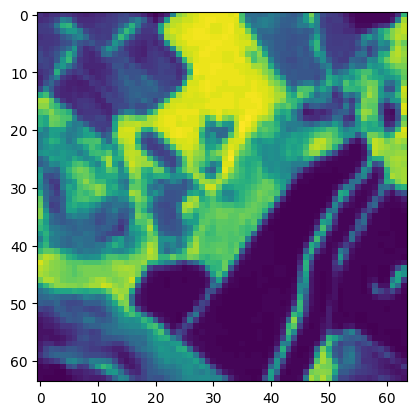

In [170]:
plt.imshow(input_img[6, 30, :, :])

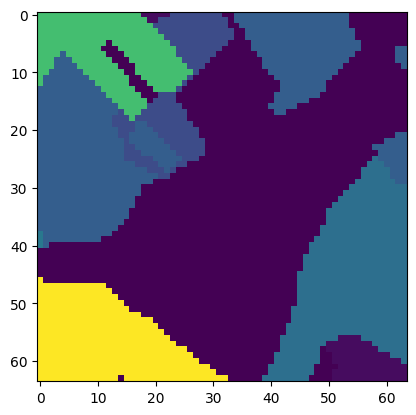

In [171]:
plt.imshow(input_mask[6, :, :])